In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Path to the src directory
src_path = '/cluster/home/taheeraa/code/master-thesis/01-multi-label/src'

if src_path not in sys.path:
    sys.path.append(src_path)


In [91]:
data_path = "/cluster/home/taheeraa/datasets/chestxray-14"
labels = [
    "Atelectasis", 
    "Cardiomegaly",
    "Effusion", 
    "Infiltration", 
    "Mass",
    "Nodule",
    "Pneumonia",
    "Pneumothorax",  
    "Consolidation",
    "Edema",
    "Emphysema",
    "Fibrosis",
    "Pleural Thickening",
    "Hernia"
]
file_path_train = data_path + '/train_official.txt'
file_path_val = data_path + '/val_official.txt'
file_path_test = data_path + '/test_official.txt'

columns = ['Image Filename'] + labels

df_train = pd.read_csv(file_path_train, sep='\s+', names=columns)
df_val = pd.read_csv(file_path_val, sep='\s+', names=columns)
df_test = pd.read_csv(file_path_test, sep='\s+', names=columns)

df = pd.concat([df_train, df_val, df_test], ignore_index=True)

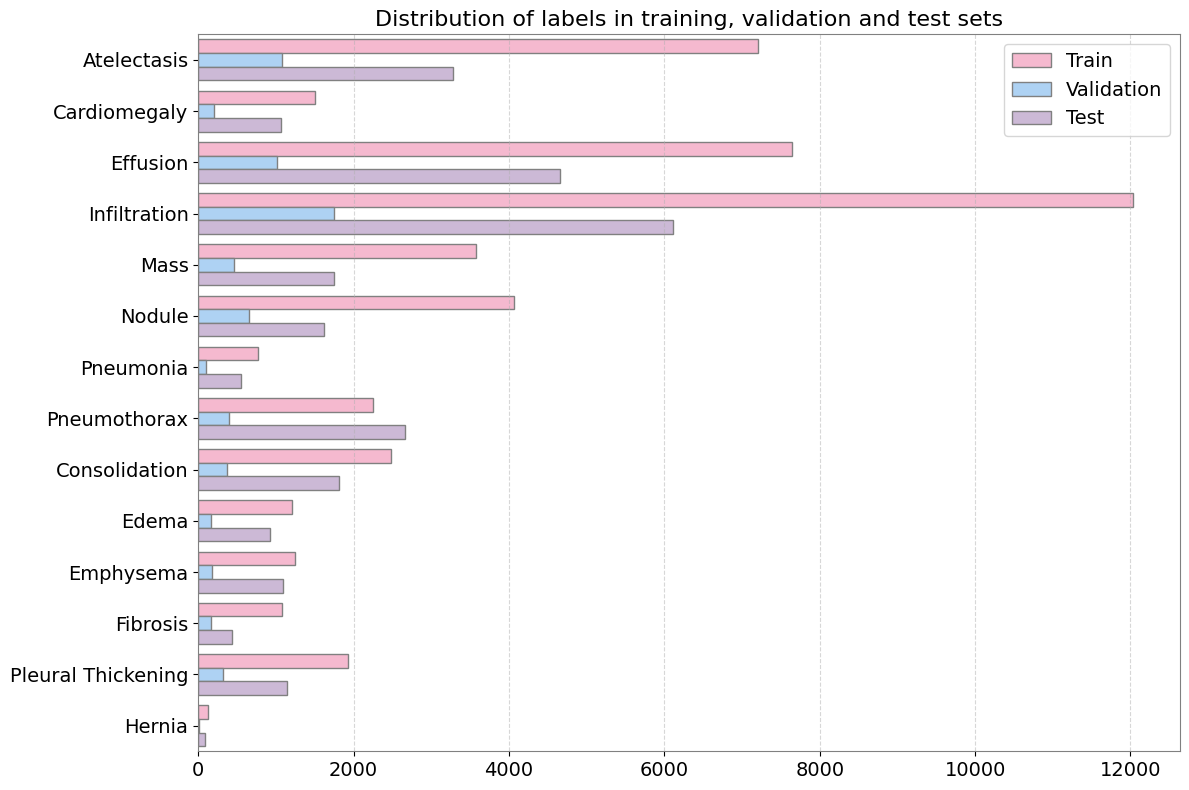

In [108]:
font_size_title = 16
font_size_labels = 14


train_counts = df_train[labels].sum().rename('Train')
val_counts = df_val[labels].sum().rename('Validation')
test_counts = df_test[labels].sum().rename('Test')

# Combine the counts into a single dataframe
label_counts = pd.concat([train_counts, val_counts, test_counts], axis=1)

# Reset the index to make 'labels' a column
label_counts = label_counts.reset_index().rename(columns={'index': 'Label'})

# Melt the dataframe for easier plotting
label_counts_melted = pd.melt(label_counts, id_vars=['Label'], var_name='Set', value_name='Count')

# Plot the data
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='Label', x='Count', hue='Set', data=label_counts_melted, palette=['#FFAFCC', '#A2D2FF', '#CDB4DB'],edgecolor="gray")
plt.title('Distribution of labels in training, validation and test sets', fontsize=font_size_title)
plt.xlabel('', fontsize=font_size_labels)
plt.ylabel('', fontsize=font_size_labels)
plt.xticks(fontsize=font_size_labels)
plt.yticks(fontsize=font_size_labels)

# Customize the spines
for spine in ax.spines.values():
    spine.set_edgecolor('gray')

legend = ax.legend(title=None, fontsize=font_size_labels)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("percentage_train_val_test.png")
plt.show()


/tmp/ipykernel_65334/2099557622.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors, edgecolor="gray")
/tmp/ipykernel_65334/2099557622.py:17: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors, edgecolor="gray")


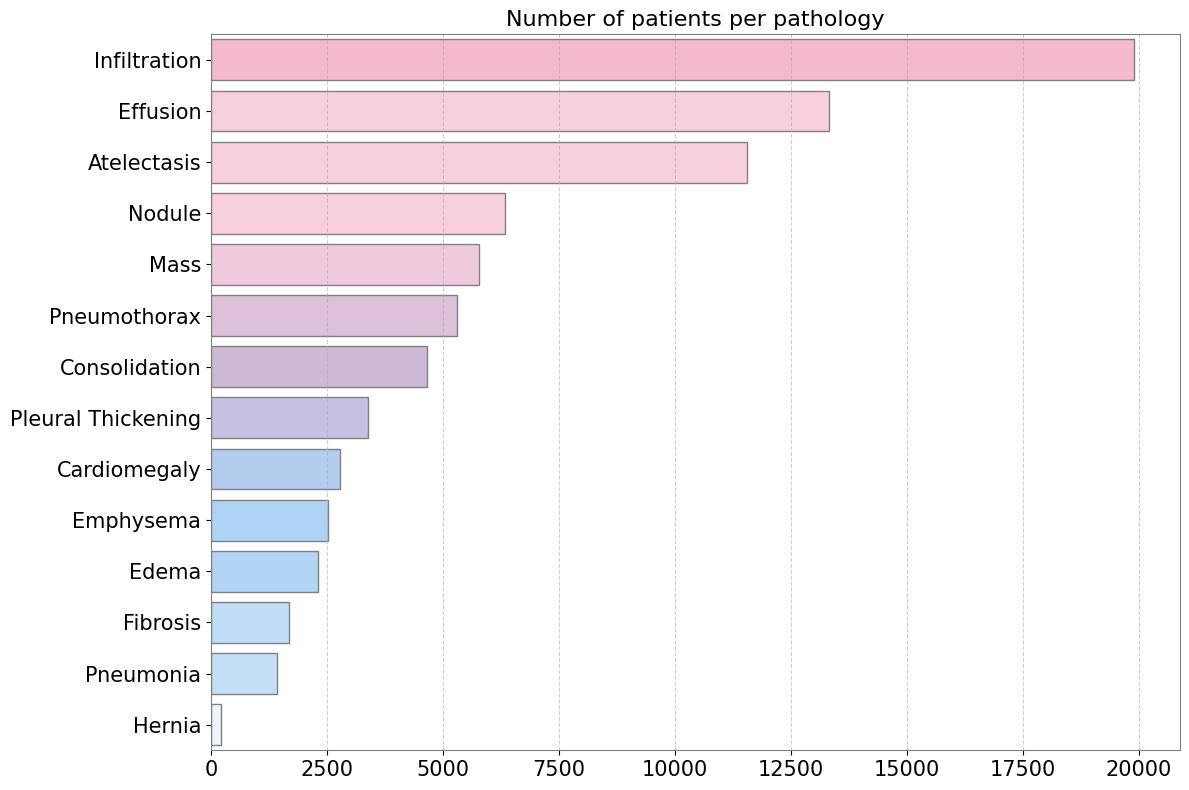

In [92]:
custom_colors = ["#FFAFCC", "#FFAFCC", "#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD", "#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD","#FFC8DD", "#CDB4DB","#CDB4DB", "#A2D2FF", "#BDE0FE","#EBF5FF"]


# Assuming df and labels are already defined
# Calculate label counts
label_counts = df[labels].sum().sort_values(ascending=False)

# Define custom colors and create a colormap
custom_colors = custom_colors[::-1]  # Reverse the color order
cmap = LinearSegmentedColormap.from_list('custom_cmap', custom_colors, N=256)

# Normalize the label_counts values to range between 0 and 1 for color mapping
norm = plt.Normalize(label_counts.values.min(), label_counts.values.max())
colors = cmap(norm(label_counts.values))

# Create the barplot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=label_counts.values, y=label_counts.index, palette=colors, edgecolor="gray")
plt.xlabel('', fontsize=15)
plt.ylabel('')  # Remove default y-label
plt.yticks(fontsize=15)  # Increase fontsize for y-ticks
plt.xticks(fontsize=15)  # Increase fontsize for x-ticks
plt.title('Number of patients per pathology', size=16)

# Customize the axis colors
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('no-patients-per-disease.png')

In [68]:
file_path_data_entry = data_path + '/Data_Entry_2017.csv'
df = pd.read_csv(file_path_data_entry)
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [24]:
# Patient Age Summary
age_summary = df['Patient Age'].describe()

# Count of Patient Gender
gender_counts = df['Patient Gender'].value_counts()

# Count of View Position
view_position_counts = df['View Position'].value_counts()


/tmp/ipykernel_65334/4221755838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x=df['Patient Gender'], edgecolor='gray', palette=['#FFAFCC', '#A2D2FF'])
/tmp/ipykernel_65334/4221755838.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.countplot(x=df['View Position'], edgecolor='gray', palette=['#CDB4DB', '#BAA4C7'])


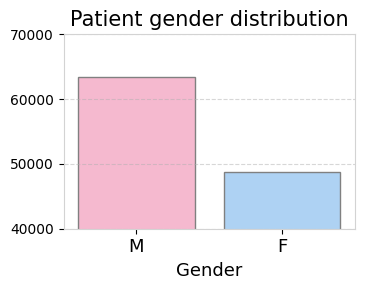

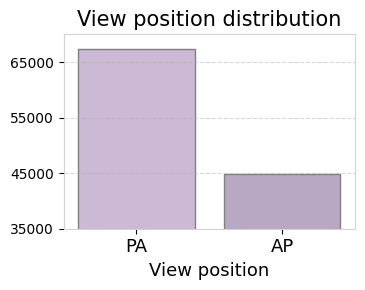

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming font_size_title and font_size_labels are defined
font_size_title = 15
font_size_labels = 13
fig_size = (3.75, 3)

# Patient Gender Distribution
plt.figure(figsize=fig_size)
ax1 = sns.countplot(x=df['Patient Gender'], edgecolor='gray', palette=['#FFAFCC', '#A2D2FF'])
plt.title('Patient gender distribution', size=font_size_title)
plt.ylabel('', size=font_size_labels)
plt.xlabel('Gender', size=font_size_labels)
plt.ylim(40000, 70000)
plt.yticks(ticks=[40000, 50000, 60000, 70000])
plt.xticks(fontsize=font_size_labels)  # Set x-axis tick labels font size
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize the spines
for spine in ax1.spines.values():
    spine.set_edgecolor('lightgrey')

plt.tight_layout()
plt.savefig("gender_dist.png")

# View Position Distribution
plt.figure(figsize=fig_size)
ax2 = sns.countplot(x=df['View Position'], edgecolor='gray', palette=['#CDB4DB', '#BAA4C7'])
plt.title('View position distribution', size=font_size_title)
plt.ylabel('', size=font_size_labels)
plt.xlabel('View position', size=font_size_labels)
plt.ylim(35000, 70000)
plt.yticks(ticks=[35000, 45000, 55000, 65000])
plt.xticks(fontsize=font_size_labels)  # Set x-axis tick labels font size
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize the spines
for spine in ax2.spines.values():
    spine.set_edgecolor('lightgrey')

plt.tight_layout()
plt.savefig("view_pos_dist.png")

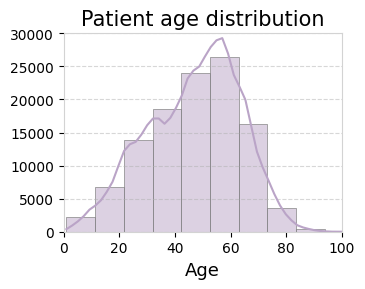

In [89]:
# Define font sizes
# Patient Age Distribution
plt.figure(figsize=fig_size)
sns.histplot(df['Patient Age'], bins=40, kde=True, color='#BAA4C7', edgecolor='gray')
plt.title('Patient age distribution', size=font_size_title)
plt.xlabel('Age', size=font_size_labels)
plt.ylabel('', size=font_size_labels)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize the spines
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('lightgrey')
plt.xlim(0, 100)
plt.ylim(0, 30000)
plt.tight_layout()
plt.savefig("patient_age_dist.png")